<a href="https://colab.research.google.com/github/Siddartha-Gurugubelli/Image_Classification/blob/main/Minor_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%ls /content/drive/MyDrive/images

 apple/  'black grapes'/   jasmine/


In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.io import imread


In [3]:
target = [] 
images = []
flat_data = [] 
DATADIR = '/content/drive/MyDrive/images'

CATEGORIES = ['apple','black grapes','jasmine']

for i in CATEGORIES:
  class_target = CATEGORIES.index(i)
  path = os.path.join(DATADIR,i)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resized = resize(img_array,(300,300,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_target)
    
flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

In [4]:
df=pd.DataFrame(flat_data)
df['Target']=target
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,269961,269962,269963,269964,269965,269966,269967,269968,269969,269970,269971,269972,269973,269974,269975,269976,269977,269978,269979,269980,269981,269982,269983,269984,269985,269986,269987,269988,269989,269990,269991,269992,269993,269994,269995,269996,269997,269998,269999,Target
0,0.575674,0.348223,0.101164,0.575037,0.347586,0.100527,0.574941,0.347490,0.100431,0.572163,0.344712,0.097654,0.568569,0.338667,0.098961,0.564974,0.333601,0.098307,0.563176,0.331804,0.096510,0.561706,0.330333,0.097980,0.564528,0.333155,0.105704,0.576676,0.345303,0.117852,0.573591,0.342218,0.115748,0.569163,0.337791,0.118183,0.561974,0.330601,0.110993,0.554784,...,0.412454,0.224219,0.075199,0.427624,0.239389,0.090369,0.428314,0.240078,0.091059,0.428314,0.240078,0.091059,0.428314,0.240078,0.091059,0.428314,0.240078,0.091059,0.428314,0.240078,0.091059,0.428314,0.240078,0.091059,0.428314,0.240078,0.091059,0.423933,0.237985,0.093541,0.413294,0.232902,0.099569,0.413294,0.232902,0.099569,0.413294,0.232902,0.099569,0
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0
2,0.697158,0.377884,0.171373,0.682429,0.360663,0.162763,0.652986,0.330166,0.143143,0.621740,0.292378,0.122814,0.592073,0.256760,0.107858,0.567318,0.229087,0.099291,0.550815,0.210385,0.098512,0.541549,0.200725,0.106224,0.534191,0.200717,0.111709,0.522045,0.200594,0.117921,0.513578,0.197888,0.121549,0.493027,0.194510,0.115110,0.471431,0.189022,0.105216,0.447198,...,0.329375,0.074963,0.121042,0.320529,0.073471,0.104843,0.317039,0.069980,0.101353,0.313405,0.066346,0.097719,0.307070,0.060012,0.091384,0.302774,0.055715,0.087088,0.296872,0.049813,0.081185,0.292032,0.044973,0.076345,0.288614,0.041555,0.072928,0.285211,0.038152,0.069525,0.282353,0.035294,0.066667,0.282353,0.035294,0.066667,0.282353,0.035294,0.066667,0
3,0.098102,0.157651,0.012505,0.098767,0.178263,0.020380,0.096218,0.201995,0.028978,0.082646,0.221284,0.028919,0.062359,0.232135,0.022725,0.046492,0.240050,0.018281,0.045281,0.258431,0.021568,0.065392,0.278542,0.034908,0.093622,0.293622,0.046505,0.125498,0.298684,0.059187,0.117752,0.262497,0.038638,0.097370,0.217496,0.011075,0.152436,0.250918,0.053827,0.303020,...,0.179739,0.266013,0.011111,0.184314,0.272830,0.011203,0.197961,0.288157,0.018078,0.225252,0.316618,0.037429,0.247006,0.341123,0.048391,0.242549,0.336765,0.030588,0.222235,0.319837,0.003503,0.225503,0.323542,0.000000,0.249583,0.350034,0.014897,0.261231,0.355688,0.057656,0.232026,0.318301,0.070000,0.167529,0.253804,0.018706,0.121935,0.208209,0.001608,0
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.990993,0.990993,0.990993,0.998713,0.998713,0.998713,0.992647,0.992647,0.992647,0.896507,0.896507,0.896507,0.741115,0.741115,0.741115,0.726042,0.726042,0.726042,0.736397,0.736397,0.736397,0.742279,0.742279,0.742279,0.738542,0.738542,0.738542,0.734498,0.734498,0.734498,0.732598,0.732598,0.732598,0.734252,0.734252,0.734252,0.737439,0.737439,0.737439,0
...,...,..

In [5]:
x=flat_data
y=target

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size = 0.25,random_state=0,stratify=y)
print(x_train.shape)
print(x_test.shape)

(67, 270000)
(23, 270000)


In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
svc =SVC()
parameters = {
    'kernel':['linear','rbf'],
    'C':[0.1,0.01,1,10,100]
}
cv = GridSearchCV(svc,parameters,cv =5)
cv.fit(x_train,y_train)
cv.best_params_

{'C': 0.1, 'kernel': 'linear'}

In [9]:
model = SVC(C = 0.1, kernel ='linear')
model.fit(x_train,y_train)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [10]:
y_pred = model.predict(x_test)
y_pred

array([0, 1, 1, 0, 0, 1, 2, 1, 2, 1, 0, 0, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1,
       0])

In [11]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [12]:
accuracy_score(y_pred,y_test)

0.9130434782608695

In [13]:
confusion_matrix(y_pred,y_test)

array([[6, 0, 0],
       [1, 8, 0],
       [1, 0, 7]])

In [14]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         6
           1       1.00      0.89      0.94         9
           2       1.00      0.88      0.93         8

    accuracy                           0.91        23
   macro avg       0.92      0.92      0.91        23
weighted avg       0.93      0.91      0.92        23



Enter your URLhttps://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQmM5GkR92_6iU8osLt7PvYzbNJ0OTL0dMbPw&usqp=CAU
PREDICTED OUTPUT : jasmine


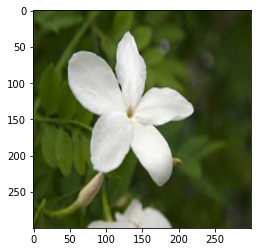

In [16]:
flat_data = []
url = input("Enter your URL")
img = imread(url)
img_resized = resize(img,(300,300,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT : {y_out}')